In [1]:
import pandas as pd
df=pd.read_csv('d:/data/ozone/ozone4.csv')
df.head()

,Ozone,Solar.R,Solar.R2,Wind,Temp,Month,Day,Ozone2,Result
0,41.0,190.0,190.000000,7.4,67,5,1,41.00000,0
1,36.0,118.0,118.000000,8.0,72,5,2,36.00000,0
2,12.0,149.0,149.000000,12.6,74,5,3,12.00000,0
3,18.0,313.0,313.000000,11.5,62,5,4,18.00000,0
4,NaN,NaN,185.931507,14.3,56,5,5,42.12931,0


In [2]:
df.columns#필드명

Index(['Ozone', 'Solar.R', 'Solar.R2', 'Wind', 'Temp', 'Month', 'Day',
       'Ozone2', 'Result'],
      dtype='object')

In [3]:
df.shape #데이터의 차원

(153, 9)

In [4]:
df.describe() #기초통계량

,Ozone,Solar.R,Solar.R2,Wind,Temp,Month,Day,Ozone2,Result
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,185.931507,9.957516,77.882353,6.993464,15.803922,42.129310,0.287582
std,32.987885,90.058422,87.960267,3.523001,9.465270,1.416522,8.864520,28.693372,0.454122
min,1.000000,7.000000,7.000000,1.700000,56.000000,5.000000,1.000000,1.000000,0.000000
25%,18.000000,115.750000,120.000000,7.400000,72.000000,6.000000,8.000000,21.000000,0.000000
50%,31.500000,205.000000,194.000000,9.700000,79.000000,7.000000,16.000000,42.129310,0.000000
75%,63.250000,258.750000,256.000000,11.500000,85.000000,8.000000,23.000000,46.000000,1.000000
max,168.000000,334.000000,334.000000,20.700000,97.000000,9.000000,31.000000,168.000000,1.000000


In [5]:
df.groupby('Result').mean() #0,1 클래스별 평균값

,Ozone,Solar.R,Solar.R2,Wind,Temp,Month,Day,Ozone2
Result,,,,,,,,
0,20.902778,173.548077,174.116124,10.926606,74.440367,6.761468,15.678899,28.108115
1,76.863636,216.595238,215.201432,7.556818,86.409091,7.568182,16.113636,76.863636


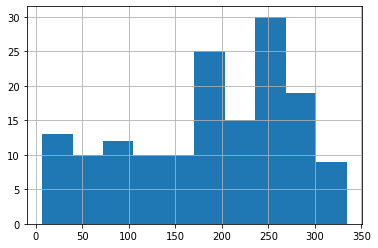

In [6]:
%matplotlib inline
df['Solar.R2'].hist() #히스토그램

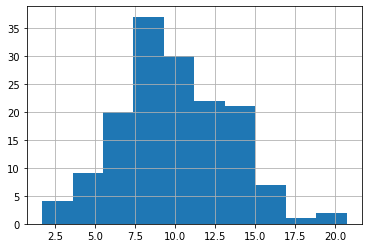

In [7]:
df['Wind'].hist()

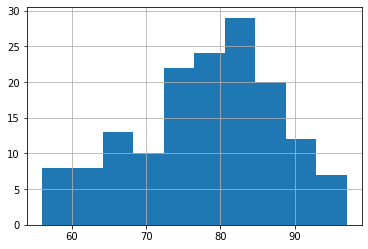

In [8]:
df['Temp'].hist()

In [9]:
df['Result'].value_counts() #클래스별 카운트

0    109
1     44
Name: Result, dtype: int64

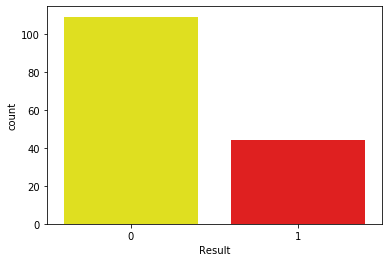

In [10]:
import seaborn as sns
colors=['yellow','red']
sns.countplot('Result',data=df, palette=colors) #카운트 플롯

In [16]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
cols=['Solar.R2','Wind','Temp']
X=df[cols] #독립변수
y=df['Result'] #종속변수
#언더샘플링 함수, random_state 값에 따라서 샘플링 결과가 바뀌게 됨
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=cols)
y_samp=pd.DataFrame(data=y_sample,columns=['Result'])
#데이터프레임을 가로방향으로 연결시킴 axis=1 가로방향
df2=pd.concat([X_samp,y_samp],axis=1)

1    44
0    44
Name: Result, dtype: int64


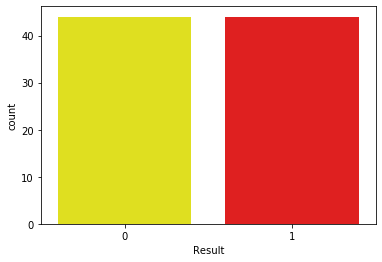

In [17]:
#언더샘플링 후의 카운트 플롯
print(df2['Result'].value_counts())
colors=['yellow','red']
sns.countplot('Result',data=df2,palette=colors) #카운트 플롯

In [14]:
# #오버샘플링
# from imblearn.over_sampling import SMOTE
# cols=['Solar.R2','Wind','Temp']
# X=df[cols] #독립변수
# y=df['Result'] #종속변수
# #언더샘플링 함수, random_state 값에 따라서 샘플링 결과가 바뀌게 됨
# X_sample,y_sample=SMOTE(random_state=0).fit_sample(X,y)
# X_samp=pd.DataFrame(data=X_sample,columns=cols)
# y_samp=pd.DataFrame(data=y_sample,columns=['Result'])
# #데이터프레임을 가로방향으로 연결시킴 axis=1 가로방향
# df2=pd.concat([X_samp,y_samp],axis=1)

1    109
0    109
Name: Result, dtype: int64


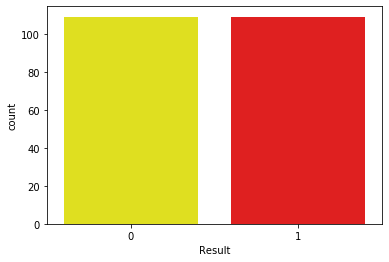

In [15]:
# #오버샘플링 후의 카운트 플롯
# print(df2['Result'].value_counts())
# colors=['yellow','red']
# sns.countplot('Result',data=df2,palette=colors) #카운트플롯

In [18]:
#언더샘플링 데이터에서 X,y분리
X=X_samp[cols]
y=y_samp['Result']

In [19]:
import statsmodels.api as sm
model=sm.Logit(y,X) #로지스틱 회귀분석 모형
result=model.fit() #기계학습
result.summary2() #모형 요약
#Pseudo R-squared:0.287 모형의 설명력 28.7%
#Solar.R2 변수는 유의하지 않음

Optimization terminated successfully.
         Current function value: 0.494249
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.287     
Dependent Variable: Result           AIC:              92.9878   
Date:               2020-02-18 15:05 BIC:              100.4198  
No. Observations:   88               Log-Likelihood:   -43.494   
Df Model:           2                LL-Null:          -60.997   
Df Residuals:       85               LLR p-value:      2.5034e-08
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Solar.R2       0.0046    0.0034   1.3391  0.1805  -0.0021   0.0114
Wind          -0.4390    0.0983  -4.4644  0.0000  -0.6318  -0.2463
Temp           0.0388    0.0128   3.0331  0.0024   0.0137   0.0639
=================================================================

"""

In [21]:
#Solar.R2 변수를 제외한 모향
X=X_samp[['Wind','Temp']]
y=y_samp['Result']
model=sm.Logit(y,X) #로지스틱 회귀분석 모형
result=model.fit() #기계학습
result.summary2()
#Pseudo R-squared: 0.272 모형 설명력 27.2%
#Wind -0.4263 풍량이 증가하면 오존량이 감소한다

Optimization terminated successfully.
         Current function value: 0.504742
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.272     
Dependent Variable: Result           AIC:              92.8345   
Date:               2020-02-18 15:08 BIC:              97.7892   
No. Observations:   88               Log-Likelihood:   -44.417   
Df Model:           1                LL-Null:          -60.997   
Df Residuals:       86               LLR p-value:      8.4907e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Wind      -0.4263     0.0954   -4.4705   0.0000   -0.6132   -0.2394
Temp       0.0485     0.0109    4.4368   0.0000    0.0271    0.0700
=================================================================

"""

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#학습용, 검증용 8:2로 구분
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)
model=LogisticRegression() #로지스틱 회귀분석 모형
model.fit(X_train,y_train) #기계학습

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
print(model.score(X_train,y_train)) #학습용
print(model.score(X_test,y_test)) #검증용

0.8142857142857143
0.6666666666666666


In [29]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
print(pred) #모형이 예측한 값
print(y_test.values) #실제값
cm=confusion_matrix(y_test,pred) #오분류표
print(cm)
cm

[1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1]
[0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1]
[[6 5]
 [1 6]]


array([[6, 5],
       [1, 6]], dtype=int64)

In [30]:
#인덱스와 컬럼 이름을 추가한 데이터프레임
df_cm=pd.DataFrame(cm,index=[0,1],columns=[0,1])
df_cm

,0,1
0,6,5
1,1,6


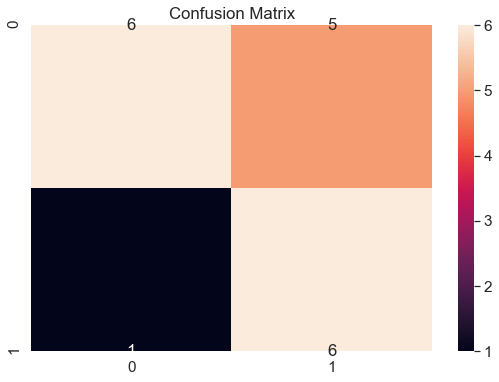

In [31]:
import matplotlib.pyplot as plt
sns.set(font_scale=1.4) #그래프의 폰트 사이즈
plt.figure(figsize=(9,6)) #그래프의 가로,세로 사이즈
plt.title('Confusion Matrix') #그래프의 타이틀
sns.heatmap(df_cm, annot=True) #혼동행렬 그래프